In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
df=pd.read_csv("parkinsons.csv")

In [ ]:
df

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [ ]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [ ]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [ ]:
#to see all the rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.000070,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.000080,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.000090,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.000090,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.000110,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.000080,0.00463,0.00750,0.01388,0.04701,0.456,0.02328,0.03526,0.03243,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.000030,0.00155,0.00202,0.00466,0.01608,0.140,0.00779,0.00937,0.01351,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.000030,0.00144,0.00182,0.00431,0.01567,0.134,0.00829,0.00946,0.01256,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.000060,0.00293,0.00332,0.00880,0.02093,0.191,0.01073,0.01277,0.01717,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.000060,0.00268,0.00332,0.00803,0.02838,0.255,0.01441,0.01725,0.02444,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


In [ ]:
df.shape

(195, 24)

In [ ]:
df.isnull().sum()
#there is no null value ... so it is a good dataset

,0
name,0
MDVP:Fo(Hz),0
MDVP:Fhi(Hz),0
MDVP:Flo(Hz),0
MDVP:Jitter(%),0
MDVP:Jitter(Abs),0
MDVP:RAP,0
MDVP:PPQ,0
Jitter:DDP,0
MDVP:Shimmer,0


In [ ]:
#'value_counts()' method in Pandas is used to get a Series containing the counts of unique values in a column
df['status'].value_counts()
# 1: those who are affected by partition
# 0: those who are not affected by partition

,count
status,
1,147
0,48


In [ ]:
#df is the DataFrame you have created, which contains your data.
#status is the column name based on which you want to group the DataFrame.
#.groupby('status') groups the DataFrame 'df' based on unique values in the 'status' column.
#.mean() calculates the mean for each group separately
df.groupby('status').mean(numeric_only=True)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,,
0,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,0.009504,0.010509,0.013305,0.028511,0.011483,24.678750,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
1,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,0.017676,0.020285,0.027600,0.053027,0.029211,20.974048,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828


In [ ]:
X=df.drop(columns=['name', 'status'],axis=1)
Y=df['status']

In [ ]:
print(X)

     MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0        119.992       157.302        74.997         0.00784   
1        122.400       148.650       113.819         0.00968   
2        116.682       131.111       111.555         0.01050   
3        116.676       137.871       111.366         0.00997   
4        116.014       141.781       110.655         0.01284   
5        120.552       131.162       113.787         0.00968   
6        120.267       137.244       114.820         0.00333   
7        107.332       113.840       104.315         0.00290   
8         95.730       132.068        91.754         0.00551   
9         95.056       120.103        91.226         0.00532   
10        88.333       112.240        84.072         0.00505   
11        91.904       115.871        86.292         0.00540   
12       136.926       159.866       131.276         0.00293   
13       139.173       179.139        76.556         0.00390   
14       152.845       163.305        75

In [ ]:
print(Y)

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
30     0
31     0
32     0
33     0
34     0
35     0
36     1
37     1
38     1
39     1
40     1
41     1
42     0
43     0
44     0
45     0
46     0
47     0
48     0
49     0
50     0
51     0
52     0
53     0
54     1
55     1
56     1
57     1
58     1
59     1
60     0
61     0
62     0
63     0
64     0
65     0
66     1
67     1
68     1
69     1
70     1
71     1
72     1
73     1
74     1
75     1
76     1
77     1
78     1
79     1
80     1
81     1
82     1
83     1
84     1
85     1
86     1
87     1
88     1
89     1
90     1
91     1
92     1
93     1
94     1
95     1
96     1
97     1
98     1
99     1
100    1
101    1
102    1
103    1
104    1
105    1
106    1
107    1
108    1
109    1
110    1
1

In [ ]:
X_train, X_test, Y_train,Y_test= train_test_split(X,Y, test_size=0.2,random_state=2)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(195, 22) (156, 22) (39, 22)


In [ ]:
ss=StandardScaler()

In [ ]:
# data standardization
# Process of transforming data into standardized format so that user may process any value
#fit training data into it
ss.fit(X_train)

StandardScaler()

In [ ]:
X_train=ss.transform(X_train)
X_test=ss.transform(X_test)

In [ ]:
print(X_train)

[[ 0.63239631 -0.02731081 -0.87985049 ... -0.97586547 -0.55160318
   0.07769494]
 [-1.05512719 -0.83337041 -0.9284778  ...  0.3981808  -0.61014073
   0.39291782]
 [ 0.02996187 -0.29531068 -1.12211107 ... -0.43937044 -0.62849605
  -0.50948408]
 ...
 [-0.9096785  -0.6637302  -0.160638   ...  1.22001022 -0.47404629
  -0.2159482 ]
 [-0.35977689  0.19731822 -0.79063679 ... -0.17896029 -0.47272835
   0.28181221]
 [ 1.01957066  0.19922317 -0.61914972 ... -0.716232    1.23632066
  -0.05829386]]


In [ ]:
print(X_test)

[[-1.70008583e+00 -9.67968410e-01 -7.70130215e-01 -2.75000683e-01
   4.16156683e-01 -2.92615113e-01 -9.70869783e-02 -2.91621655e-01
  -4.94706656e-01 -4.90058396e-01 -5.32488171e-01 -4.26848854e-01
  -3.60251422e-01 -5.32484688e-01 -3.57189713e-01 -1.08840337e-01
   1.06963705e+00  1.05628304e+00  3.72180199e-01  1.94886208e+00
   3.66935071e-02  4.44314482e-01]
 [-1.39044095e+00 -9.29681132e-01 -7.37045677e-01  7.42068829e-01
   1.50451280e+00  8.54349819e-01  7.33639862e-01  8.53234751e-01
  -3.12538562e-03  3.01660094e-01  1.16511011e-01 -7.67595149e-02
  -2.23967413e-01  1.16829276e-01 -1.19644974e-01 -5.22790834e-01
   9.12650090e-01  1.31721995e+00  6.70118138e-01  4.74318608e-01
   1.42454868e-02  7.46859799e-01]
 [-1.35302065e+00 -6.29175292e-01 -7.29027225e-01  4.92094897e-01
   1.23242377e+00  4.52288742e-01  3.45291949e-01  4.53262231e-01
  -1.57435662e-01 -1.27992014e-01 -6.49095096e-02 -2.59345791e-01
  -2.60383383e-01 -6.52155416e-02  2.54927471e-01 -6.85306331e-01
   1.6

# SVM(Support vector machine) Model

In [ ]:
#SVM(Support vector machine is used. It is used in email, web pages, handwriting recognization, page identification, gene classification)
SVM=svm.SVC(kernel='linear')

In [ ]:
SVM.fit(X_train, Y_train)

SVC(kernel='linear')

In [ ]:
#model evaluation
#by prediction check the accuracy of train and test data
X_train_pred=SVM.predict(X_train)
train_data_acc=accuracy_score(Y_train, X_train_pred)

In [ ]:
print("acc of training data : ", train_data_acc)

acc of training data :  0.8846153846153846


In [ ]:
X_test_pred=SVM.predict(X_test)
test_data_acc=accuracy_score(Y_test,X_test_pred)

In [ ]:
print("accuracy of testing data: ",test_data_acc)

accuracy of testing data:  0.8717948717948718


In [ ]:
# Generate the classification report
Y_pred = SVM.predict(X_test)
report = classification_report(Y_test, Y_pred)

# Print the classification report
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.62      0.67         8
           1       0.91      0.94      0.92        31

    accuracy                           0.87        39
   macro avg       0.81      0.78      0.79        39
weighted avg       0.87      0.87      0.87        39



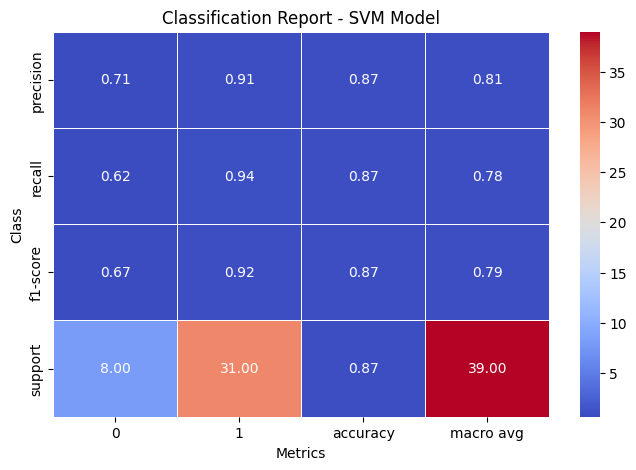

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
# Generate the classification report
report = classification_report(Y_test, Y_pred, output_dict=True)
# Convert the classification report to a DataFrame for visualization
report_df = pd.DataFrame(report).transpose()

# Plot the heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(report_df.iloc[:-1, :].T, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.xlabel('Metrics')
plt.ylabel('Class')
plt.title('Classification Report - SVM Model')
plt.show()

In [ ]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
# Predict on the test set
Y_pred = SVM.predict(X_test)
# Calculate F1-score
f1 = f1_score(Y_test, Y_pred)

# Calculate Classification Accuracy (CA)
ca = accuracy_score(Y_test, Y_pred)

# Calculate Precision
precision = precision_score(Y_test, Y_pred)

# Calculate Recall
recall = recall_score(Y_test, Y_pred)

In [ ]:
# Print the results
print("F1-score:", f1)
print("Classification Accuracy (CA):", ca)
print("Precision:", precision)
print("Recall:", recall)

F1-score: 0.9206349206349206
Classification Accuracy (CA): 0.8717948717948718
Precision: 0.90625
Recall: 0.9354838709677419


In [ ]:
input_data=(217.11600,233.48100,93.97800,0.00404,0.00002,0.00127,0.00128,0.00381,0.01299,0.12400,0.00679,0.00631,0.01075,0.02038,0.00681,24.58100,0.462516,0.582710,-5.517173,0.389295,2.925862,0.220657)
input_data_np=np.asarray(input_data)
input_data_re=input_data_np.reshape(1,-1)
s_data=ss.transform(input_data_re)
pred=SVM.predict(s_data)
print(pred)
if(pred[0]==0):
    print("Negative, No Parkinsons found")
else:
    print("Positive, Parkinsons found")

[1]
Positive, Parkinsons found


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
input_data=(229.40100,252.22100,221.15600,0.00205,0.000009,0.00114,0.00113,0.00342,0.01457,0.12900,0.00769,0.00957,0.01016,0.02308,0.00300,26.41500,0.276850,0.673636,-7.496264,0.056844,2.003032,0.073581)
input_data_np=np.asarray(input_data)
input_data_re=input_data_np.reshape(1,-1)
s_data=ss.transform(input_data_re)
pred=SVM.predict(s_data)
print(pred)
if(pred[0]==0):
    print("Negative, No Parkinsons found")
else:
    print("Positive, Parkinsons found")

[0]
Negative, No Parkinsons found


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# Logistic Regression

In [ ]:
#Logistic Regression: predict the probability that an instance belongs to a particular class
# Create and train the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
# Predict on the test set
Y_pred = logreg.predict(X_test)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8205128205128205


In [ ]:
report = classification_report(Y_test, Y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.62      0.59         8
           1       0.90      0.87      0.89        31

    accuracy                           0.82        39
   macro avg       0.73      0.75      0.74        39
weighted avg       0.83      0.82      0.82        39



In [ ]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

# Create and train the Logistic Regression model
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train, Y_train)
# Predict on the test set
Y_pred = logreg_model.predict(X_test)

# Calculate F1-score
f1 = f1_score(Y_test, Y_pred)

# Calculate Classification Accuracy (CA)
ca = accuracy_score(Y_test, Y_pred)

# Calculate Precision
precision = precision_score(Y_test, Y_pred)

# Calculate Recall
recall = recall_score(Y_test, Y_pred)

# Print the results
print("F1-score:", f1)
print("Classification Accuracy (CA):", ca)
print("Precision:", precision)
print("Recall:", recall)


F1-score: 0.8852459016393444
Classification Accuracy (CA): 0.8205128205128205
Precision: 0.9
Recall: 0.8709677419354839


In [ ]:
input_data=(217.11600,233.48100,93.97800,0.00404,0.00002,0.00127,0.00128,0.00381,0.01299,0.12400,0.00679,0.00631,0.01075,0.02038,0.00681,24.58100,0.462516,0.582710,-5.517173,0.389295,2.925862,0.220657)
input_data_np=np.asarray(input_data)
input_data_re=input_data_np.reshape(1,-1)
s_data=ss.transform(input_data_re)
pred=logreg_model.predict(s_data)
print(pred)
if(pred[0]==0):
    print("Negative, No Parkinsons found")
else:
    print("Positive, Parkinsons found")

[1]
Positive, Parkinsons found


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
input_data=(229.40100,252.22100,221.15600,0.00205,0.000009,0.00114,0.00113,0.00342,0.01457,0.12900,0.00769,0.00957,0.01016,0.02308,0.00300,26.41500,0.276850,0.673636,-7.496264,0.056844,2.003032,0.073581)
input_data_np=np.asarray(input_data)
input_data_re=input_data_np.reshape(1,-1)
s_data=ss.transform(input_data_re)
pred=logreg_model.predict(s_data)
print(pred)
if(pred[0]==0):
    print("Negative, No Parkinsons found")
else:
    print("Positive, Parkinsons found")

[0]
Negative, No Parkinsons found


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# KNN(K-Nearest Neighbors)

In [ ]:
# Train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  #Let's start with k=5
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [ ]:
# Predict on the test set
Y_pred = knn.predict(X_test)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7692307692307693


In [ ]:
report = classification_report(Y_test, Y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.75      0.57         8
           1       0.92      0.77      0.84        31

    accuracy                           0.77        39
   macro avg       0.69      0.76      0.71        39
weighted avg       0.83      0.77      0.79        39



In [ ]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
# Create and train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can set the number of neighbors (n_neighbors) as needed
knn_model.fit(X_train, Y_train)

# Predict on the test set
Y_pred = knn_model.predict(X_test)

# Calculate F1-score
f1 = f1_score(Y_test, Y_pred)

# Calculate Classification Accuracy (CA)
ca = accuracy_score(Y_test, Y_pred)

# Calculate Precision
precision = precision_score(Y_test, Y_pred)

# Calculate Recall
recall = recall_score(Y_test, Y_pred)

# Print the results
print("F1-score:", f1)
print("Classification Accuracy (CA):", ca)
print("Precision:", precision)
print("Recall:", recall)


F1-score: 0.8421052631578947
Classification Accuracy (CA): 0.7692307692307693
Precision: 0.9230769230769231
Recall: 0.7741935483870968


In [ ]:
input_data=(217.11600,233.48100,93.97800,0.00404,0.00002,0.00127,0.00128,0.00381,0.01299,0.12400,0.00679,0.00631,0.01075,0.02038,0.00681,24.58100,0.462516,0.582710,-5.517173,0.389295,2.925862,0.220657)
input_data_np=np.asarray(input_data)
input_data_re=input_data_np.reshape(1,-1)
s_data=ss.transform(input_data_re)
pred=knn.predict(s_data)
print(pred)
if(pred[0]==0):
    print("Negative, No Parkinsons found")
else:
    print("Positive, Parkinsons found")

[1]
Positive, Parkinsons found


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
input_data=(229.40100,252.22100,221.15600,0.00205,0.000009,0.00114,0.00113,0.00342,0.01457,0.12900,0.00769,0.00957,0.01016,0.02308,0.00300,26.41500,0.276850,0.673636,-7.496264,0.056844,2.003032,0.073581)
input_data_np=np.asarray(input_data)
input_data_re=input_data_np.reshape(1,-1)
s_data=ss.transform(input_data_re)
pred=knn.predict(s_data)
print(pred)
if(pred[0]==0):
    print("Negative, No Parkinsons found")
else:
    print("Positive, Parkinsons found")

[0]
Negative, No Parkinsons found


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
